In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import glob
import re
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
import torch
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.0 MB/s eta 0:00:00


In [5]:
negative_path = '/content/drive/MyDrive/movie/neg/*.txt'
positive_path = '/content/drive/MyDrive/movie/pos/*.txt'

In [6]:
all_neg_files = glob.glob(negative_path)
all_pos_files = glob.glob(positive_path)

In [7]:
def create_all_data(files,label):
  all_data = []
  print(files)
  for file_name in files:
    try:
      with open(file_name) as f:
        all_data.append((f.read(),label))
    except:
      print('')
  return all_data

In [8]:
all_neg_data = create_all_data(all_neg_files,0)
all_pos_data = create_all_data(all_pos_files,1)
all_data = all_neg_data + all_pos_data

['/content/drive/MyDrive/movie/neg/cv852_27512.txt', '/content/drive/MyDrive/movie/neg/cv554_14678.txt', '/content/drive/MyDrive/movie/neg/cv395_11761.txt', '/content/drive/MyDrive/movie/neg/cv185_28372.txt', '/content/drive/MyDrive/movie/neg/cv178_14380.txt', '/content/drive/MyDrive/movie/neg/cv257_11856.txt', '/content/drive/MyDrive/movie/neg/cv130_18521.txt', '/content/drive/MyDrive/movie/neg/cv676_22202.txt', '/content/drive/MyDrive/movie/neg/cv587_20532.txt', '/content/drive/MyDrive/movie/neg/cv192_16079.txt', '/content/drive/MyDrive/movie/neg/cv260_15652.txt', '/content/drive/MyDrive/movie/neg/cv910_21930.txt', '/content/drive/MyDrive/movie/neg/cv544_5301.txt', '/content/drive/MyDrive/movie/neg/cv693_19147.txt', '/content/drive/MyDrive/movie/neg/cv578_16825.txt', '/content/drive/MyDrive/movie/neg/cv413_7893.txt', '/content/drive/MyDrive/movie/neg/cv870_18090.txt', '/content/drive/MyDrive/movie/neg/cv474_10682.txt', '/content/drive/MyDrive/movie/neg/cv160_10848.txt', '/content/dri

In [9]:
all_text_data = [all_data[i][0] for i in range(len(all_data))]
all_label_data = [all_data[i][1] for i in range(len(all_data))]

In [10]:
def preprocess(data):
  corpus = []
  lemmatizer = WordNetLemmatizer() 
  for i in range(len(data)):
      review = re.sub('[^a-zA-Z]', ' ', data[i])
      review = review.lower()
      review = review.split()
      review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
      review = ' '.join(review)
      corpus.append(review)
  return corpus

In [11]:
all_preprocess_data = preprocess(all_text_data)

In [12]:
df = pd.concat([pd.DataFrame(all_preprocess_data), pd.DataFrame(all_label_data)],axis=1)

In [13]:
df.columns = ['text', 'sentiment']

In [14]:
df

,text,sentiment
0,delicatessen director marc caro jean pierre je...,0
1,grateful song grace chan comfort u starring le...,0
2,part buddy comedy part fish water story part n...,0
3,animal marginally inspired comedy manages lumb...,0
4,starring ben stiller elizabeth hurley maria be...,0
...,...,...
2001,known successful highest grossing romantic com...,1
2002,offended something mary tread water american p...,1
2003,synopsis captain picard crew starship enterpri...,1
2004,good year want plenty sci fi multiplex comedy ...,1


## Data analysis and visualization

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [16]:
df_copy = pd.DataFrame(df)
df_copy.head()

,text,sentiment
0,delicatessen director marc caro jean pierre je...,0
1,grateful song grace chan comfort u starring le...,0
2,part buddy comedy part fish water story part n...,0
3,animal marginally inspired comedy manages lumb...,0
4,starring ben stiller elizabeth hurley maria be...,0


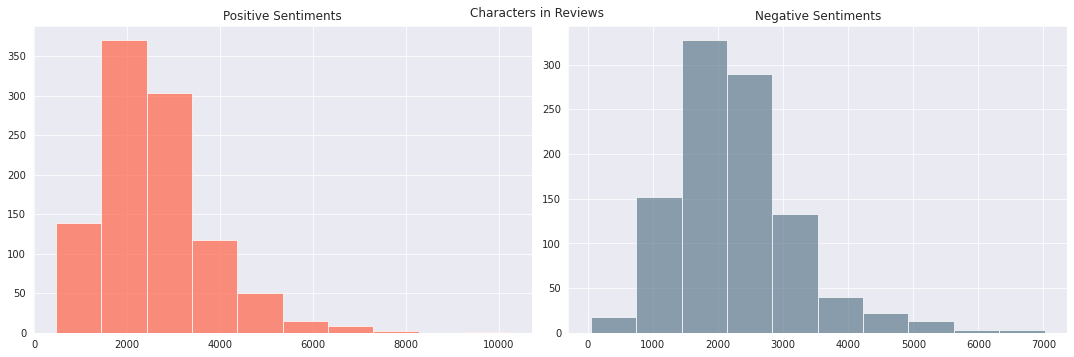

In [17]:
sns.set_style('darkgrid')
n_bins =10
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len=df_copy[df_copy['sentiment']==1]['text'].str.len()
ax1.hist(tweet_len,color='tomato',bins=n_bins,alpha = 0.7)
ax1.set_title('Positive Sentiments')
tweet_len=df_copy[df_copy['sentiment']==0]['text'].str.len()
ax2.hist(tweet_len,bins=n_bins,color ='#607c8e', alpha = 0.7)                          
ax2.set_title('Negative Sentiments')
fig.suptitle('Characters in Reviews')
plt.tight_layout(True)
plt.show()

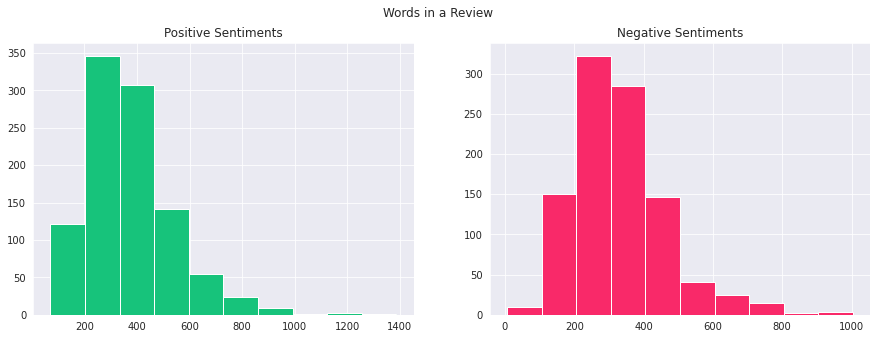

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len=df_copy[df_copy['sentiment']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')
tweet_len=df_copy[df_copy['sentiment']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')
fig.suptitle('Words in a Review')
plt.show()

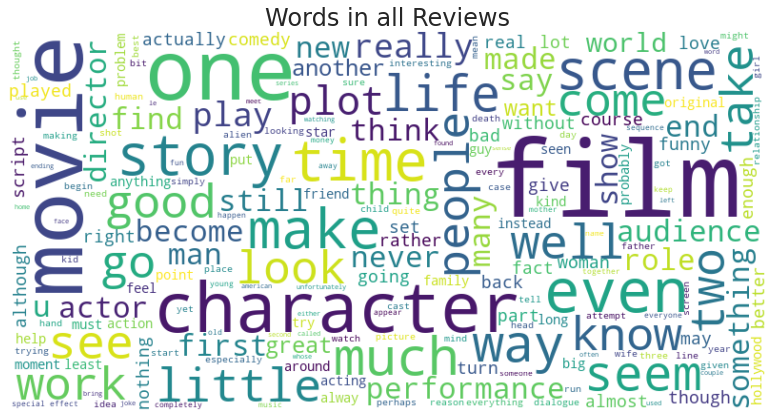

In [19]:
words = ' '.join([text for text in df_copy['text']])
wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_font_size=110)\
    .generate(words)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Words in all Reviews', fontsize=24)
plt.axis('off')
plt.show()

## Model

In [20]:
import os
from transformers import AutoConfig
import torch

In [21]:
from transformers import RobertaTokenizer
from torch.utils.data import Dataset

In [22]:
from transformers import RobertaConfig
import transformers

In [23]:
config = AutoConfig.from_pretrained("roberta-base")

In [24]:
MAX_LEN=512

In [25]:
class CustomDataset(Dataset):
      def __init__(self, dataframe, tokenizer, max_len):

        self.tokenizer = tokenizer
        self.comment_text = dataframe["text"].tolist()
        self.targets = dataframe["sentiment"].tolist()
        self.max_len = max_len
      def __len__(self):
        return len(self.comment_text)
        
      def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())
        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True,
            return_tensors='pt'
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.long).to(device)
        }

In [26]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        config = RobertaConfig()
        config.max_position_embeddings = 512
        self.l1 = transformers.RobertaModel(config).from_pretrained("roberta-base")
        self.l2 = torch.nn.Dropout(0.2)
        self.l3 = torch.nn.Linear(768,1)

    def forward(self, ids, mask, token_type_ids):
        output_1=self.l1(ids,token_type_ids=token_type_ids)
        output_2 = self.l2(output_1[1])
        output = self.l3(output_2)
        return output


In [27]:
model = BERTClass()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('GPU found (', torch.cuda.get_device_name(torch.cuda.current_device()), ')')
    torch.cuda.set_device(torch.cuda.current_device())
    print('num device avail: ', torch.cuda.device_count())

else:
    DEVICE = torch.device('cpu')
    print('running on cpu')

GPU found ( NVIDIA A100-SXM4-40GB )
num device avail:  1


In [29]:
if (device == torch.device("cuda")):
    model = model.cuda()
    # model.parameters() returns a generator obj
    # print('model loaded to gpu? ', next(model.parameters()).is_cuda)
    print('\ngpu mem alloc: ', round(torch.cuda.memory_allocated() * 1e-9, 2), ' GB')


gpu mem alloc:  0.5  GB


## Dataloader


In [30]:
df

,text,sentiment
0,delicatessen director marc caro jean pierre je...,0
1,grateful song grace chan comfort u starring le...,0
2,part buddy comedy part fish water story part n...,0
3,animal marginally inspired comedy manages lumb...,0
4,starring ben stiller elizabeth hurley maria be...,0
...,...,...
2001,known successful highest grossing romantic com...,1
2002,offended something mary tread water american p...,1
2003,synopsis captain picard crew starship enterpri...,1
2004,good year want plenty sci fi multiplex comedy ...,1


In [31]:
train_size = 0.8
train_dataset = df.sample(frac=train_size, random_state=42)
test_dataset = df.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)
train_dataset

,text,sentiment
0,italian hitchcock acknowledged master giallo m...,1
1,affluent horse breeder past come haunt age old...,0
2,susan granger review ghost mar sony picture en...,0
3,recall trial tribulation high school year peri...,1
4,back february monthly los angeles comic book s...,0
...,...,...
1600,movie one first american film done director pa...,1
1601,fellow american movie first glance look little...,1
1602,scary first word came mind movie called vampir...,0
1603,originally titled lose head parody scarlet pim...,1


In [32]:
print(df.shape)
print(train_dataset.shape)
print(test_dataset.shape)

(2006, 2)
(1605, 2)
(401, 2)


In [33]:
from torch.utils.data import DataLoader

In [34]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [35]:
MAX_len = 512

In [36]:
training_set = CustomDataset(train_dataset, tokenizer, MAX_len)
testing_set = CustomDataset(test_dataset, tokenizer, MAX_len)

In [37]:
TRAIN_BATCH_SIZE=5
VALID_BATCH_SIZE=1

In [38]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

In [39]:
train_dataloader = DataLoader(training_set, **train_params)
test_dataloader = DataLoader(testing_set, **test_params)

In [40]:
print(len(train_dataloader))

321


In [41]:
print(len(test_dataloader))

401


## Model

In [42]:
def loss_fn(outputs, targets):
    loss=torch.nn.BCEWithLogitsLoss()(outputs, targets)
    return loss

In [43]:
LEARNING_RATE=1e-5
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [44]:
def train(epoch):
    model.train()
    average_loss=0
    for i,data in enumerate(train_dataloader, 0):

        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids.squeeze(), mask.squeeze(), token_type_ids.squeeze())

        optimizer.zero_grad()

        loss = loss_fn(outputs.squeeze(), targets)
        average_loss += loss

        if i%50==0:
            print(f'Epoch: {epoch}, Loss:  {average_loss/(i+1)}')
        loss.backward() 
        optimizer.step() 
    return average_loss/i

In [58]:
EPOCHS=5
temp = []
for epoch in range(EPOCHS):
  x = train(epoch)
  temp.append(x)

Epoch: 0, Loss:  0.39516395330429077
Epoch: 0, Loss:  0.1619182527065277
Epoch: 0, Loss:  0.1429983228445053
Epoch: 0, Loss:  0.15320782363414764
Epoch: 0, Loss:  0.1696883589029312
Epoch: 0, Loss:  0.1680457890033722
Epoch: 0, Loss:  0.18826508522033691
Epoch: 1, Loss:  0.020567825064063072
Epoch: 1, Loss:  0.12052030861377716
Epoch: 1, Loss:  0.11119303107261658
Epoch: 1, Loss:  0.14414724707603455
Epoch: 1, Loss:  0.14265158772468567
Epoch: 1, Loss:  0.1286117434501648
Epoch: 1, Loss:  0.12479431927204132
Epoch: 2, Loss:  0.0065110595896840096
Epoch: 2, Loss:  0.0698726624250412
Epoch: 2, Loss:  0.09385668486356735
Epoch: 2, Loss:  0.08710680156946182
Epoch: 2, Loss:  0.07968879491090775
Epoch: 2, Loss:  0.08211897313594818
Epoch: 2, Loss:  0.09026101231575012
Epoch: 3, Loss:  0.02774442546069622
Epoch: 3, Loss:  0.08042129129171371
Epoch: 3, Loss:  0.07969854027032852
Epoch: 3, Loss:  0.06261881440877914
Epoch: 3, Loss:  0.05057426914572716
Epoch: 3, Loss:  0.046992503106594086
Epo

In [46]:
import matplotlib.pyplot as plt

In [60]:
epoch_losses_train = [temp[i].item() for i in range(0,len(temp))]

Text(0.5, 0, 'epoch')

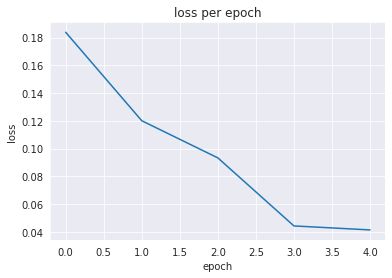

In [61]:
plt.plot([0,1,2,3,4],epoch_losses_train)
plt.title('loss per epoch')
plt.ylabel('loss')
plt.xlabel('epoch')

## Save and load model

In [49]:
model.eval()

BERTClass(
  (l1): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=

In [50]:
model_path = '/content/drive/MyDrive/movie/model.pt'

In [51]:
torch.save(model.state_dict(), model_path)

In [52]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

## Validation

In [53]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [54]:
def validation(epoch):
  model.eval()
  final_targets = []
  final_outputs = []
  sigmoid_validator = torch.nn.Sigmoid()
  with torch.no_grad():
    for i, data in enumerate(test_dataloader,0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            ids=ids.squeeze()
            mask=mask.squeeze()
            token_type_ids=token_type_ids.squeeze()
            outputs = model(ids.unsqueeze(0), mask.unsqueeze(0), token_type_ids.unsqueeze(0))
            final_targets.extend(targets.cpu().detach().numpy().tolist())
            final_outputs.extend(sigmoid_validator(outputs))
  return final_targets, final_outputs


In [56]:
for epoch in range(1):
    outputs, targets = validation(epoch)
    outputs = np.array(outputs) >= 0.5
    targets = np.array([targets[i].item() for i in range(len(targets))]) >= 0.5
    accuracy = metrics.accuracy_score(targets, outputs)
    precision = precision_score(targets, outputs)
    recall = recall_score(targets, outputs)
    f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
    f1_score_macro = metrics.f1_score(targets, outputs, average='macro')

    print(f"Accuracy Score = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"F1 Score (Micro) = {f1_score_micro}")
    print(f"F1 Score (Macro) = {f1_score_macro}")


Accuracy Score = 0.85785536159601
Precision = 0.8227272727272728
Recall = 0.9095477386934674
F1 Score (Micro) = 0.85785536159601
F1 Score (Macro) = 0.8575683742841653


[[163  39]
 [ 18 181]]


([<matplotlib.axis.YTick at 0x7f375a38a040>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

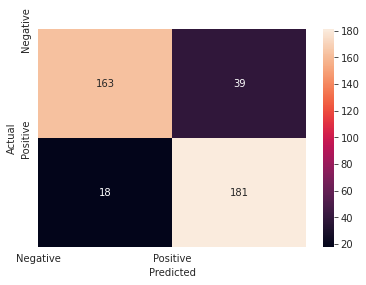

In [57]:
print(confusion_matrix(targets, outputs))
sns.heatmap(confusion_matrix(targets, outputs),annot=True,fmt = '.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks = [0,1],labels = ['Negative','Positive'])
plt.yticks(ticks = [0,1],labels = ['Negative','Positive'])